## Assignment 7: Decision Trees
### Name: Jahnavi Murali
### Reg No.: 3122215001038

## Imports 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load Data

In [35]:
data = pd.read_csv('archive/diabetes_prediction_dataset.csv')
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [36]:
print('Number of Records: ', data.shape[0], '\nNumber of Columns: ', data.shape[1])

Number of Records:  100000 
Number of Columns:  9


## Data Preprocessing

In [37]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [38]:
# Checking for Null/Missing Values in the dataset
data.isnull().sum()

# Inference : No missing values 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [39]:
# Check for duplicate records
print('Number of duplicate records: ', data.duplicated().sum())

Number of duplicate records:  3854


In [40]:
# Drop duplicates
data = data.drop_duplicates()
data['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [41]:
# Identifying non-numerical variables 
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [42]:
data['gender'].value_counts()
# Gender is categorical and can be encoded

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [43]:
# Since the number of records with gender 'Other' is significantly lower, we can remove these records.
data = data[data['gender'] != "Other"]

In [44]:
data['smoking_history'].value_counts()
# Smoking is categorical and can be encoded

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [46]:
# Male is encoded as 0 Female as 1
# Categorizing Smoking History as No Info (0), Has smoked (1) and Has never smoked (2), and conveniently encoding records according to this categorization
data["gender"] = data["gender"].apply(lambda x: 0 if x == "Male" else 1)
data["smoking_history"] = data["smoking_history"].apply(lambda x: 0 if x == "No Info" else 1 if x in ["former", "ever", "not current", "current"] else 2 )

In [80]:
print('Number of Records: ', data.shape[0], '\nNumber of Columns: ', data.shape[1])

Number of Records:  96128 
Number of Columns:  9


## Exploratory Data Analysis

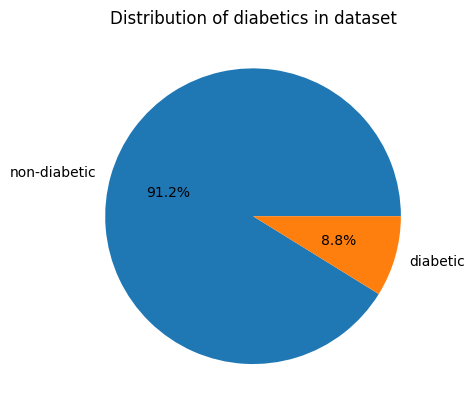

In [47]:
# Distribution of diabetics in Dataset
plt.pie(data['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

# The dataset is heavily imbalanced, therefore the model would perform better with the majority class


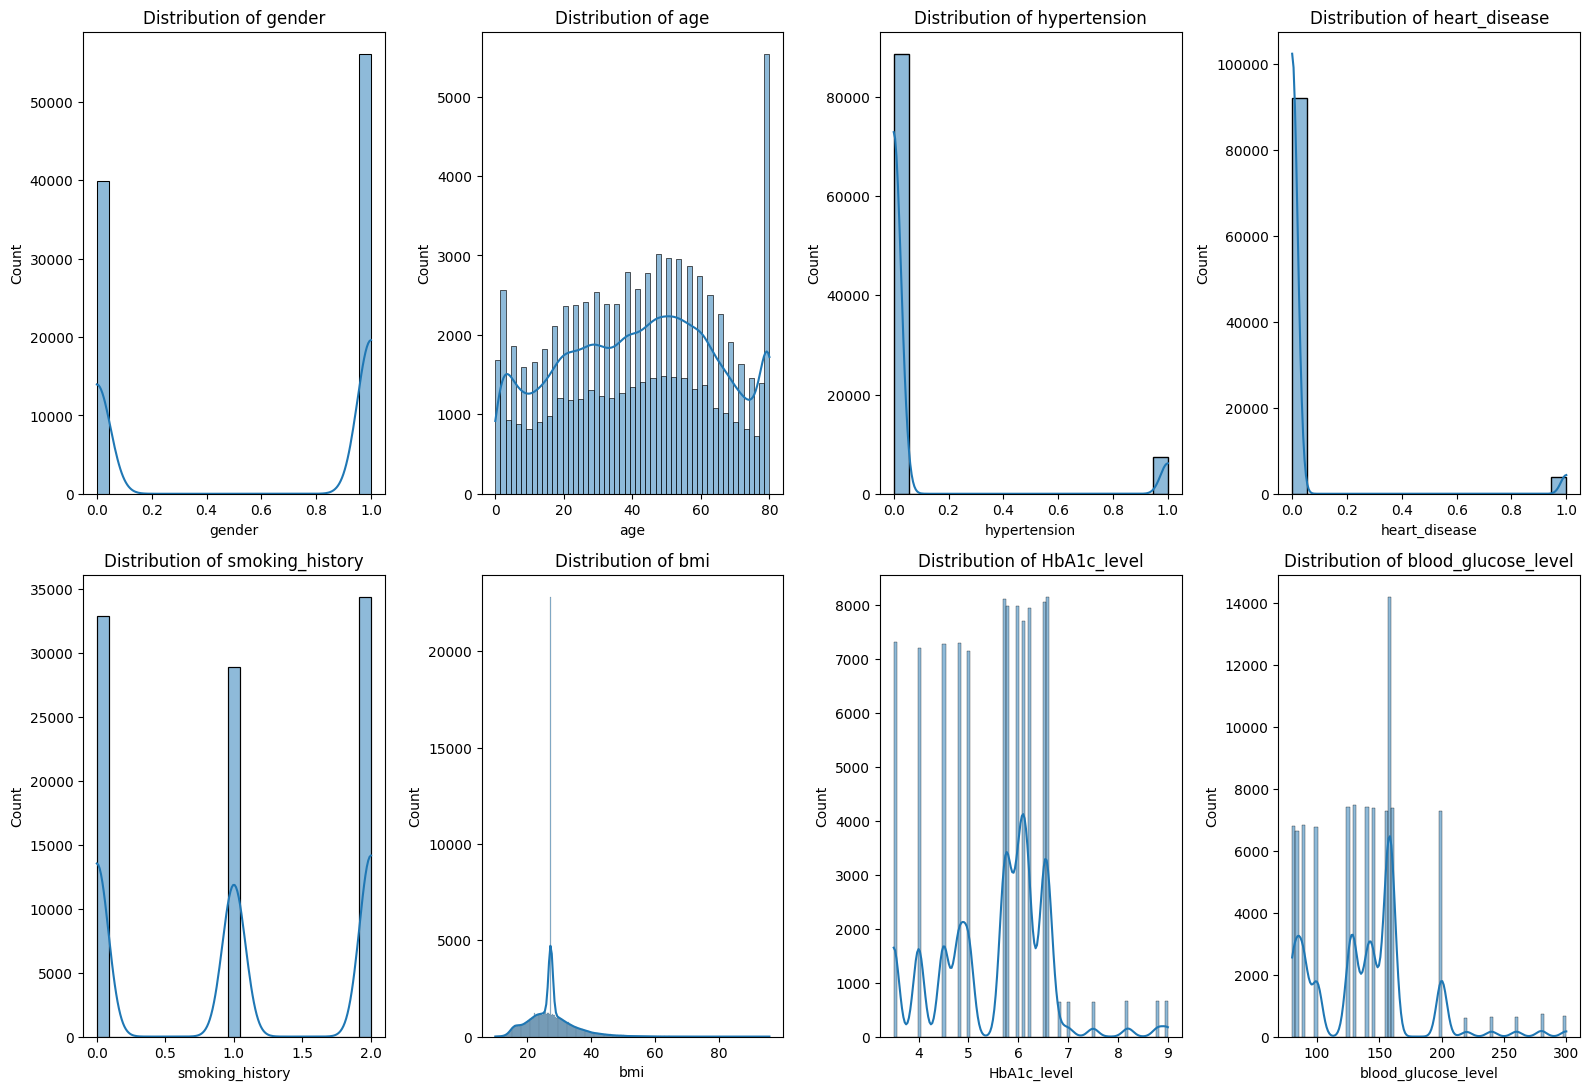

In [48]:
# Distribution of various columns in the database
df_width= len(data.columns)
rows = (df_width +3)//4
plt.figure(figsize=(16,16))

for idx, col in enumerate(data.columns):
  if col!='diabetes':
    plt.subplot(rows, 4, idx+1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.plot()

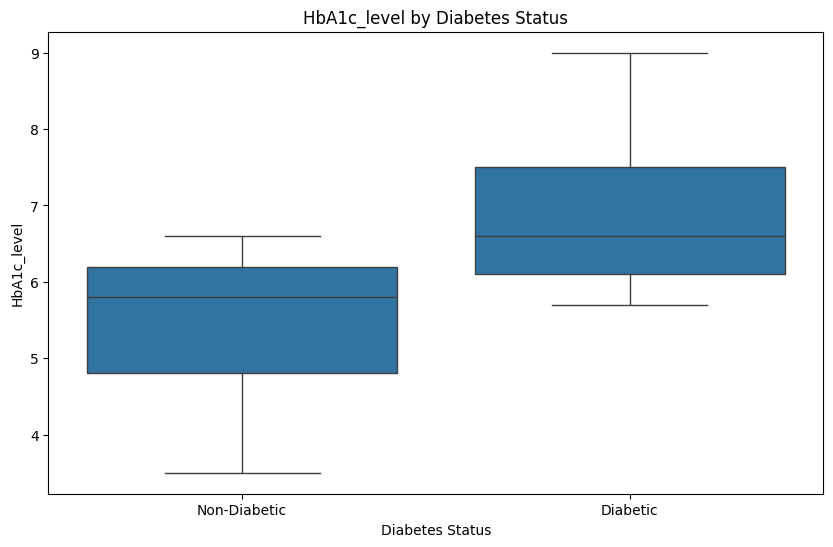

In [49]:
# Box Plot relating Diabetes to HbA1c Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic']) 
plt.show()

# It is seen that HbA1c_level of diabetics is higher than those with no diabetes

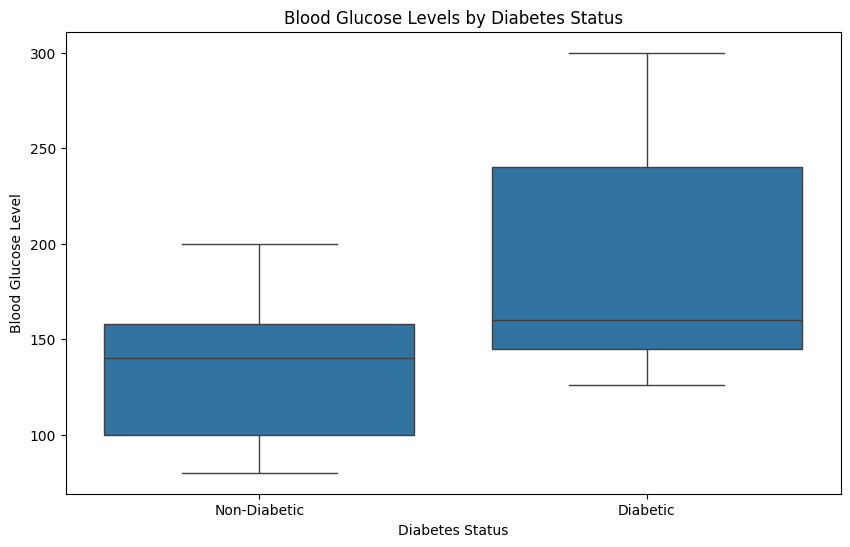

In [50]:
# Box Plot relating Diabetes to Blood Glucose Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  
plt.show()

# It is seen that blood glucose levels of diabetics is higher than non-diabetics

<AxesSubplot:>

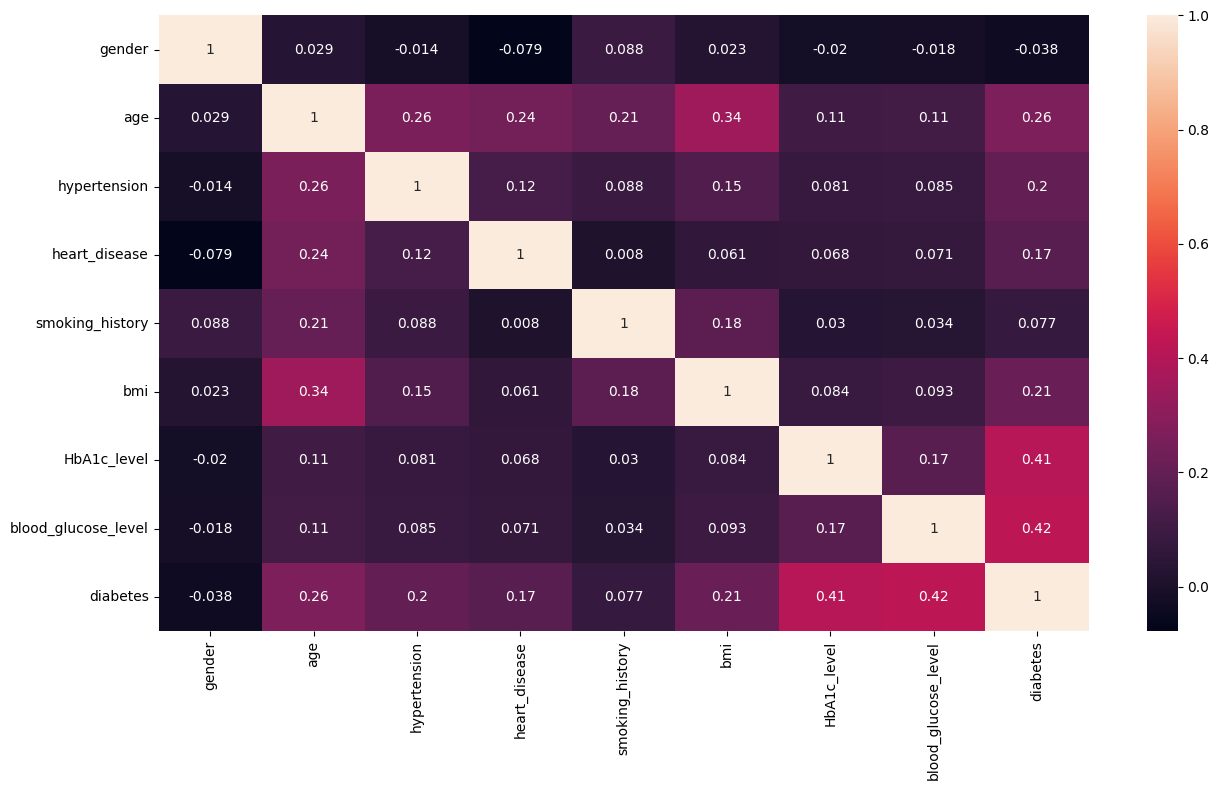

In [51]:
# Correlation matrix
relations = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=relations, annot=True)

## Feature Engineering

In [52]:
# Features and Labels
X, y = data.drop('diabetes', axis=1), data['diabetes']

In [71]:
# Feature Engineering Using feature importances
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X, y)
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. {X.columns[idx]} ({feature_importances[idx]})")


Feature ranking:
1. HbA1c_level (0.4941908907242479)
2. blood_glucose_level (0.26701534191459336)
3. bmi (0.12635444514136798)
4. age (0.06945454871379582)
5. smoking_history (0.019170229734975737)
6. gender (0.01262441568495068)
7. hypertension (0.006337471160252232)
8. heart_disease (0.004852656925816353)


In [73]:
# Top 3 features selected
X=X[['HbA1c_level', 'blood_glucose_level', 'bmi']]

## Train Test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Decision Tree Classifier

In [75]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accuracy:\n", accuracy_score(y_test, pred))

Accuracy:
 0.9398730885259544


In [76]:
print("Classification Report:")
print(classification_report(y_test, pred))

# Even though the overall accuracy of the model is 94%, we can clearly see that 
# the model performs way better for the majority class

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17525
           1       0.65      0.71      0.68      1701

    accuracy                           0.94     19226
   macro avg       0.81      0.84      0.82     19226
weighted avg       0.94      0.94      0.94     19226



Confusion Matrix:


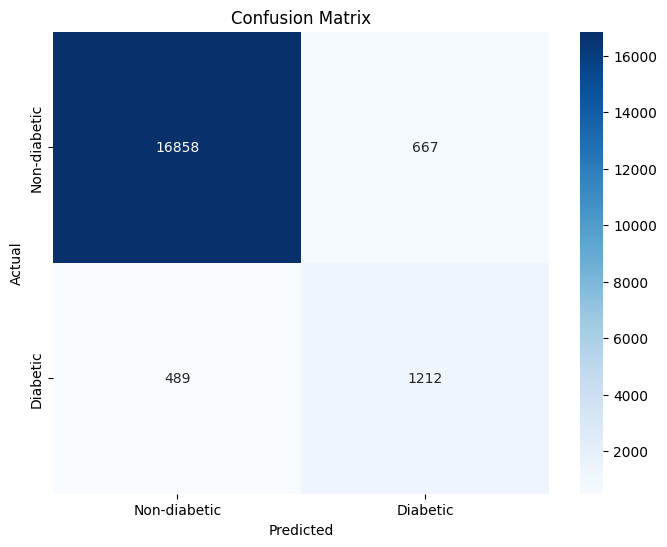

In [77]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, pred)
class_labels = ['Non-diabetic', 'Diabetic']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Inferences

- The dataset is heavily imbalanced. Hence, the model performs better in predicting the majority class. To solve this class imbalance issue, undersampling/oversampling of the dataset, and ensemble methods may be explored.
- Decision Trees are very sensitive to their hyperparameters. Model accuracy may be improved by choosing the best hyperparameters. For this purpose, GridFirstSearch may be applied.


## Learning Outcomes

- Decision Tree Classifier, Entropy and other Impurity functions
- Feature Engineerin using Feature Importances

## GitHub Link

https://github.com/jahnavimurali/ML-Assignments